# Aaron Kline

# Lab 4

In [1]:
!pip3 install torch
!pip3 install torchvision
!pip3 install tqdm
!pip install pillow==4.0.0

    100% |████████████████████████████████| 519.5MB 32kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5876a000 @  0x7f56295ab1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 5.4MB/s 
    100% |████████████████████████████████| 2.0MB 11.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 5.6MB 6.1MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0


In [ ]:
# Imports from last lab
import torch
import torch.nn as nn
from torch.nn import ReLU as relu
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
from tqdm import tqdm
# New imports
from torch.nn.parameter import Parameter
import pdb 
 
assert torch.cuda.is_available()

In [ ]:
import torchvision
import os
import gzip
import tarfile
import gc
from IPython.core.ultratb import AutoFormattedTB
__ITB__ = AutoFormattedTB(mode = 'Verbose',color_scheme='LightBg', tb_offset = 1)
 
class CancerDataset(Dataset):
    def __init__(self, root, download=True, size=512, train=True):
        if download and not os.path.exists(os.path.join(root, 'cancer_data')):
            datasets.utils.download_url('http://liftothers.org/cancer_data.tar.gz', root, 'cancer_data.tar.gz', None)
            self.extract_gzip(os.path.join(root, 'cancer_data.tar.gz'))
            self.extract_tar(os.path.join(root, 'cancer_data.tar'))

        postfix = 'train' if train else 'test'
        root = os.path.join(root, 'cancer_data', 'cancer_data')
        self.dataset_folder = torchvision.datasets.ImageFolder(os.path.join(root, 'inputs_' + postfix) ,transform = transforms.Compose([transforms.Resize(size),transforms.ToTensor()]))
        self.label_folder = torchvision.datasets.ImageFolder(os.path.join(root, 'outputs_' + postfix) ,transform = transforms.Compose([transforms.Resize(size),transforms.ToTensor()]))

    @staticmethod
    def extract_gzip(gzip_path, remove_finished=False):
        print('Extracting {}'.format(gzip_path))
        with open(gzip_path.replace('.gz', ''), 'wb') as out_f, gzip.GzipFile(gzip_path) as zip_f:
            out_f.write(zip_f.read())
        if remove_finished:
            os.unlink(gzip_path)
 
    @staticmethod
    def extract_tar(tar_path):
        print('Untarring {}'.format(tar_path))
        z = tarfile.TarFile(tar_path)
        z.extractall(tar_path.replace('.tar', ''))
 
 
    def __getitem__(self,index):
        img = self.dataset_folder[index]
        label = self.label_folder[index]
        return img[0],label[0][0]
 
    def __len__(self):
        return len(self.dataset_folder)

In [ ]:
class CancerDetection(nn.Module):
    def __init__(self):
        super(CancerDetection, self).__init__()
 
        self.conv1 = nn.Conv2d(3,64,kernel_size = 3, stride = 1, padding = 1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1)
        self.relu4 = nn.ReLU()
        self.mxpl5 = nn.MaxPool2d(2)
        #elf.batnorm = nn.BatchNorm2d(
        
        self.conv6 = nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1)
        self.relu7 = nn.ReLU()
        self.conv8 = nn.Conv2d(128,128,kernel_size = 3, stride = 1, padding = 1)
        self.relu9 = nn.ReLU()
        self.mxpl10 = nn.MaxPool2d(2)
        
        self.conv11 = nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1)
        self.relu12 = nn.ReLU()
        self.conv13 = nn.Conv2d(256,256,kernel_size = 3, stride = 1, padding = 1)
        self.relu14 = nn.ReLU()
        self.mxpl15 = nn.MaxPool2d(2)
        
        self.conv16 = nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1)
        self.relu17 = nn.ReLU()
        self.conv18 = nn.Conv2d(512,512,kernel_size = 3, stride = 1, padding = 1)
        self.relu19 = nn.ReLU()
        self.mxpl20 = nn.MaxPool2d(2)
        
        self.conv21 = nn.Conv2d(512,1024,kernel_size = 3, stride = 1, padding = 1)
        self.relu22 = nn.ReLU()
        self.conv23 = nn.Conv2d(1024,1024,kernel_size = 3, stride = 1, padding = 1)
        self.relu24 = nn.ReLU()
        self.cotr25 = nn.ConvTranspose2d(1024,512, 2, stride = 2)
        
        self.conv26 = nn.Conv2d(1024,512,kernel_size = 3, stride = 1, padding = 1)
        self.relu27 = nn.ReLU()
        self.conv28 = nn.Conv2d(512,512,kernel_size = 3, stride = 1, padding = 1)
        self.relu29 = nn.ReLU()
        self.cotr30 = nn.ConvTranspose2d(512,256,2, stride = 2)
        
        self.conv31 = nn.Conv2d(512,256,kernel_size = 3, stride = 1, padding = 1)
        self.relu32 = nn.ReLU()
        self.conv33 = nn.Conv2d(256,256,kernel_size = 3, stride = 1, padding = 1)
        self.relu34 = nn.ReLU()
        self.cotr35 = nn.ConvTranspose2d(256,128,2, stride = 2)
        
        self.conv36 = nn.Conv2d(256,128,kernel_size = 3, stride = 1, padding = 1)
        self.relu37 = nn.ReLU()
        self.conv38 = nn.Conv2d(128,128,kernel_size = 3, stride = 1, padding = 1)
        self.relu39 = nn.ReLU()
        self.cotr40 = nn.ConvTranspose2d(128,64,2, stride = 2)
        
        self.conv41 = nn.Conv2d(128,64,kernel_size = 3, stride = 1, padding = 1)
        self.relu42 = nn.ReLU()
        self.conv43 = nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1)
        self.relu44 = nn.ReLU()
        self.conv45 = nn.Conv2d(64,2,kernel_size = 1, stride = 1, padding = 0)
 
    def forward(self, input):
        
        relu4_out = self.relu4(self.conv3(self.relu2(self.conv1(input)))) # Use in conv41
        
        relu9_out = self.relu9(self.conv8(self.relu7(self.conv6(self.mxpl5(relu4_out))))) # Use in conv36
        
        relu14_out = self.relu14(self.conv13(self.relu12(self.conv11(self.mxpl10(relu9_out))))) # Use in conv31
        
        relu19_out = self.relu19(self.conv18(self.relu17(self.conv16(self.mxpl15(relu14_out))))) # Use in conv26
         
        returner = self.cotr25(self.relu24(self.conv23(self.relu22(self.conv21(self.mxpl20(relu19_out))))))
        
        returner = self.conv26(torch.cat((relu19_out, returner),1))

        returner = self.cotr30(self.relu29(self.conv28(self.relu27(returner))))
        
        returner = self.conv31(torch.cat((relu14_out, returner),1))

        returner = self.cotr35(self.relu34(self.conv33(self.relu32(returner))))
        
        returner = self.conv36(torch.cat((relu9_out, returner),1))

        returner = self.cotr40(self.relu39(self.conv38(self.relu37(returner))))
        
        returner = self.conv41(torch.cat((relu4_out, returner),1))
        
        returner = self.conv45(self.relu44(self.conv43(self.relu42(returner))))
        
        
        return returner
    

model = CancerDetection()
model = model.cuda()
    
losses = []
validations = []
accuracy = []
val_losses = []
train_dataset = CancerDataset('/tmp/mycancerdata')
val_dataset = CancerDataset('/tmp/mycancerdata', train=False)

def scope():
    try:
        

        #your code for calling dataset and dataloader
 
        gc.collect()
        print(torch.cuda.memory_allocated(0) / 1e9)

        
        
        
        objective = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr= 1e-4)
        train_loader = DataLoader(train_dataset,
                                 batch_size=2,
                                 pin_memory=True,
                                 shuffle = True)
        val_loader = DataLoader(val_dataset,
                                 batch_size=2,
                                 pin_memory=True)

        
        
        #for epochs:
        #  Call your model,loss and accuracy
        for epoch in range(4):

            loop = tqdm(total=len(train_loader), position=0, leave=False)

            for batch, (x,y_truth) in enumerate(train_loader):

                x, y_truth = x.cuda(async=True), y_truth.cuda(async=True)
                y_truth = y_truth.long()
                optimizer.zero_grad()
                y_hat = model(x)
                loss = objective(y_hat, y_truth)
                loss.backward()

                losses.append(loss.item())
                blah = (y_hat.argmax(1) == y_truth).float().mean()
                accuracy.append(blah)
                loop.set_description('epoch: {}, loss: {:.4f}, accuracy: {:.3f}'.format(epoch, loss.item(), blah))
                loop.update(1)


                optimizer.step()

                if batch % 100 == 0:
                    acc_vals = []
                    loss_vals = []
                    for x,y in val_loader:
                        x, y = x.cuda(), y.cuda()
                        y_hat = model(x)
                        y = y.long()
                        
                        loss = objective(y_hat, y)
                        loss.backward()
                        loss_vals.append(loss.item())
                        
                        acc_vals.append((y_hat.argmax(1) == y).float().mean())
                    
                    validations.append(np.mean(acc_vals))
                    val_losses.append(np.mean(loss_vals))
                    
                    

            loop.close()
        
 
        
 
    except:
        __ITB__()

scope()


# Graph of the losses

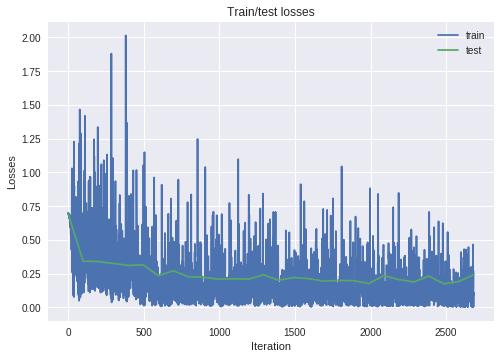

In [36]:
plt.plot(losses, label= 'train')
plt.plot(np.linspace(0,len(losses),len(val_losses)),val_losses, label = 'test')
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.title("Train/test losses")
plt.legend()
plt.show()

# Graph of the accuracy

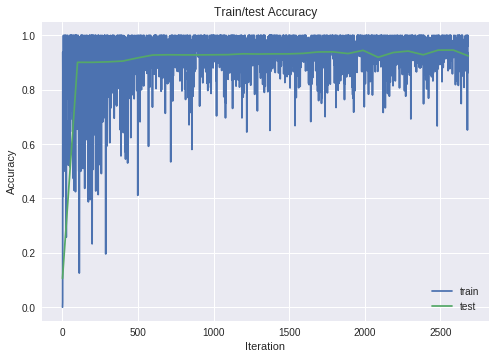

In [35]:
plt.plot(accuracy, label= 'train')
plt.plot(np.linspace(0,len(accuracy),len(validations)),validations, label = 'test')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Train/test Accuracy")
plt.legend()
plt.show()

# Image (im0172) to run through network

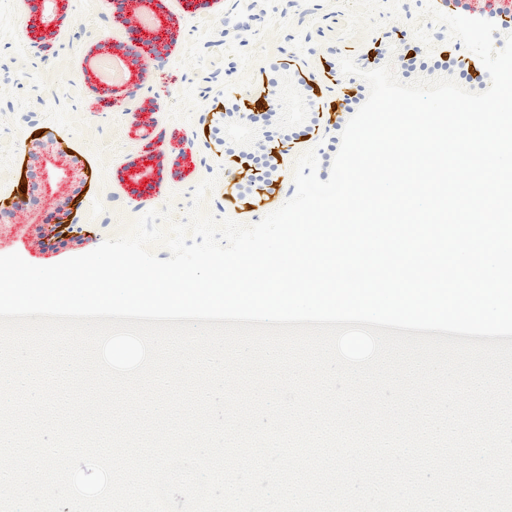

In [30]:
import PIL.Image
x = np.array(val_dataset.__getitem__(172)[0]).T*255.9
x = x.astype(np.uint8)
PIL.Image.fromarray(x)

# Prediction made by the model

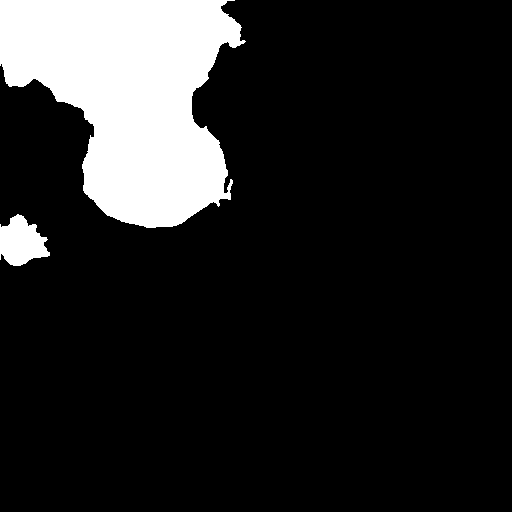

In [31]:
y = val_dataset.__getitem__(172)[0]
y = y.view([1,3,512,512])
y = model(y.cuda())
y = y.squeeze(0)
y = torch.argmax(y,0)
y = np.array(y).T*255.999
y = y.astype(np.uint8)
PIL.Image.fromarray(y)

# True answer

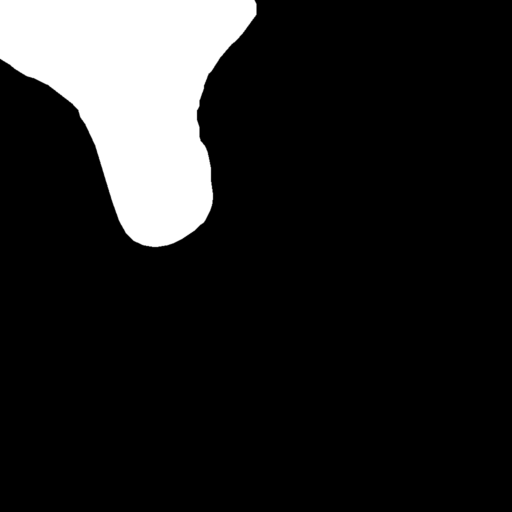

In [32]:
z = np.array(val_dataset.__getitem__(172)[1]).T*255.9
z = z.astype(np.uint8)
PIL.Image.fromarray(z)